# Obligatorio 1

El opbligatorio consta de dos actividades, en primer lugar, la implementación de los algoritmos de aprendizaje vistos en clase, estos es:
1. Implementación de los algoritmos de aprendizaje: 
    * Fictitious Play (FP) 
    * Regret Matching (RM) 
    * Independent Q-Learning (IQL) 
    * Joint-Action Learning - Agent Modeling (JAL-AM)  

Y por otro lado constara de la validación de los algoritmos a través de la experimentación. Para eso se define la interacción con los siguientes ambientes:  

2. Validación de los algoritmos con los ambientes:  
    * Matching Pennies (MP)   
    * Rock-Paper-Scissor (RPS)   
    * Blotto   
    * Foraging   

## Implementación de los algoritmos

Los algoritmos de aprendizaje fueron implementados cada uno con su propia clase de Python, los mismos serán adjuntados junto al informe y el resto de los códigos. A continuación listamos los códigos de las implementaciones:    

* Fictitious Play (FP): fictitious.py  
* Regret Matching (RM): regretmatching.py  
* Independet Q-Learning (IQL): iql_agent.py  
* Joint-Action Learning - Agent Modeling (JAL-AM): jalam_agent.py    
* RandomAgent (RA): random_agent.py  

A su vez, para entrenar a cada uno de los agentes utilizando los ambientes pertinentes, generamos un *notebook* para cada uno de ellos:    
* IQL.ipynb: *Notebook* para entrenar agentes IQL en el juego *Foraging*.  
* JALAM.ipynb: *Notebook* para entrenar agentes JAL-AM en el juego *Foraging*.  
* JALAMvsIQL.ipynb: *Notebook* para entrenar agentes JAL-AM en conjunto con agentes IQL sobre el juego *Foraging*.  
* FP.ipynb: *Notebook* para entrenar agentes FP para cualquiera de los ambientes *Matching Pennies*, *RPS* O *Blotto*.    
* RM.ipynb: *Notebook* para entrenar agentes RM para cualquiera de los ambientes *Matching Pennies*, *RPS* O *Blotto*.    
* FPvsRA.ipynb: *Notebook* para entrenar un agente FP para cualquiera de los ambientes *Matching Pennies*, *RPS* O *Blotto* junto a un RA.  
* RMvsRA.ipynb: *Notebook* para entrenar un agente RM para cualquiera de los ambientes *Matching Pennies*, *RPS* O *Blotto* junto a un RA.    
* RMvsFP.ipynb: *Notebook* para entrenar un agente RM para cualquiera de los ambientes *Matching Pennies*, *RPS* O *Blotto* junto a un FP.    


**Nota:** A todos los *notebooks* que no sean este se les hará un *Clear All Outputs* para disminuir su tamaño, por lo tanto, este reporte intentara condensar e ilustrar los graficos y resultados de todos los experimentos realizados.

## Validaciones  

Esta sección será la más extensa puesto que intentaremos, de manera ordenada, explicar y analizar los experimentos realizados y los resultados obtenidos en los diferentes ambientes a la vez que comparamos los resultados de los diferentes tipos de agentes.  

### FP vs FP
En este apartado observaremos como interactuan dos agentes que implementan el algoritmo de *Ficticious Play*. 

#### Matching Pennies   
Siempre que presentemos un nuevo ambiente, describiremos brevemente las reglas del juego y otros elementos del ambiente.  

**Descripción:**  
Matching Pennies es un juego competitivo donde dos jugadores deben elegir el lado de una moneda, la elección puede ser cara (H *heads*) o cruz (T *tails*). Por defecto el jugador 1 gana si ambos jugadores eligen la misma cara de la moneda y el jugador 2 gana si eligen diferente.  

**Ambiente:**  
* Tipo de juego: *Repeated Normal-Form Game*.  
* Jugadores: Siempre 2.    
* Conjunto de acciones posibles: $A = \{H, T\}$.  
* Valores posibles del estado: $S = \{(H, H), (H, T), (T, H), (T, T)\}$.  
* Recompensas: $R = \{-1, 1\}$, r=1 es la recompensa por ganar y r=-1 por perder.  

**Nota:** Las recompensas son de suma cero.

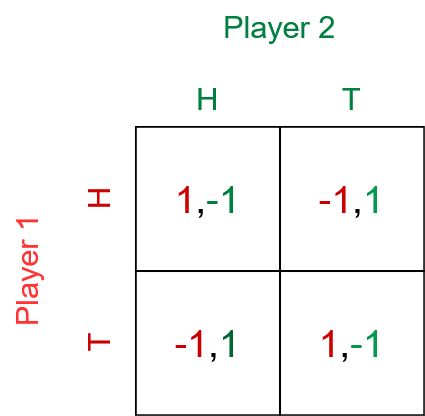


**Resultados:**  
Cuando dos agentes que implementan *ficticiousplay* compiten en *Matching Pennies* sus politicas terminan por converger al valor esperado de $\pi (a=H)= \pi (a=T) = 0.5$. Esto se debe a que *ficticiousplay* va a converger a un equilibrio de Nash, en este caso el único equilibrio que existe es el recién planteado. Es bastante intuitivo en este caso pensar en que si ambos jugadores juegan de forma lógica, intentando ganar, ambos llegaran a la conclusión de que lo mejor que pueden hacer es jugar de manera uniforme a las opciones que tienen.  

**Experimentos:**  
Luego de entrenar a los agentes llegamos a algo muy similar a $\pi^*$:   
{'agent_0': array([0.49840299, 0.50159701]),  
 'agent_1': array([0.49935399, 0.50064601])}  

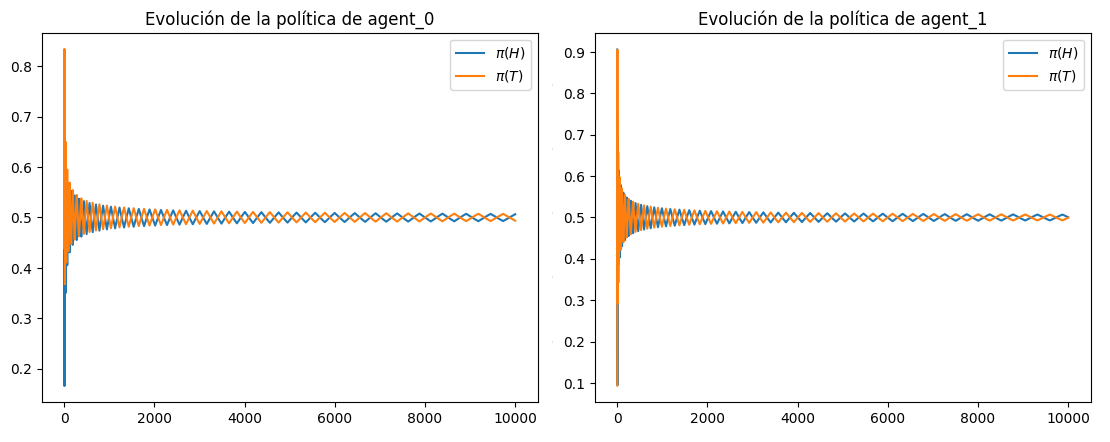

Las políticas de los agentes convergen al equilibrio de Nash $\pi(0.5, 0.5)$.

#### Rock, Paper, Scissors

**Descripción:**  
Este juego no necesita introducción, es el conocido Piedra, Papel y Tijera.  

**Ambiente:**  
* Tipo de juego: *Repeated Normal-Form Game*.  
* Jugadores: Siempre 2.    
* Conjunto de acciones posibles: $A = \{R, P, S\}$.  
* Valores posibles del estado: $S = {(R, R), (R, P), (R, S), (P, R), (P, P), (P, S), (S, R), (S, P), (S, S)}$
* Recompensas: $R = \{-1, 0, 1\}$, r=1 es la recompensa por ganar, r=0 de empatar y r=-1 por perder.  

**Nota:** Las recompensas son de suma cero.  

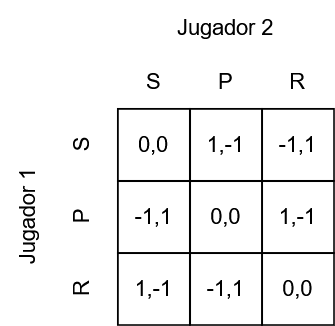

**Resultados:**  
Cuando dos agentes que implementan *ficticiousplay* compiten en *Rock, Paper, Scissors* sus politicas terminan por converger al valor esperado de $\pi (a=R)= \pi (a=P) = \pi (a=S) = \frac{1}{3}$. De la misma forma que era intuitivo pensar que esto ocurriera en *Matching Pennies*, también es intuitivo que sucede en este juego, si ambos jugadores juegan con intención de ganar y no se sesgan por un resultado, entonces el equilibrio es elegir la acción al azar.  

**Experimentos:**  
Luego de entrenar a los agentes llegamos a algo muy similar a $\pi^*$:    
{'agent_0': array([0.33082032, 0.33853934, 0.33064033]),  
 'agent_1': array([0.33454649, 0.32690839, 0.33854512])}  

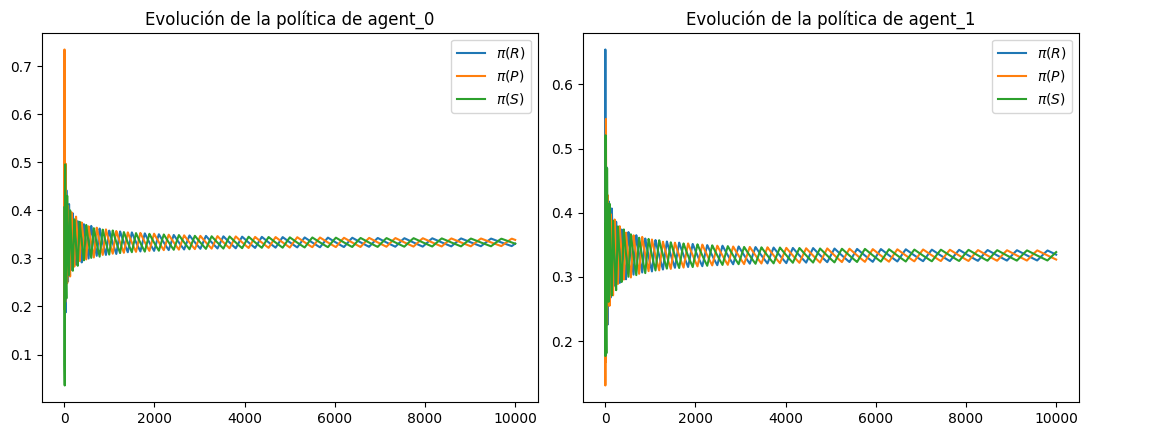

En las imagenes presentadas podemos observar como convergen las políticas de los agentes hacía el equilibrio de Nash $\pi(\frac{1}{3},\frac{1}{3},\frac{1}{3})$.

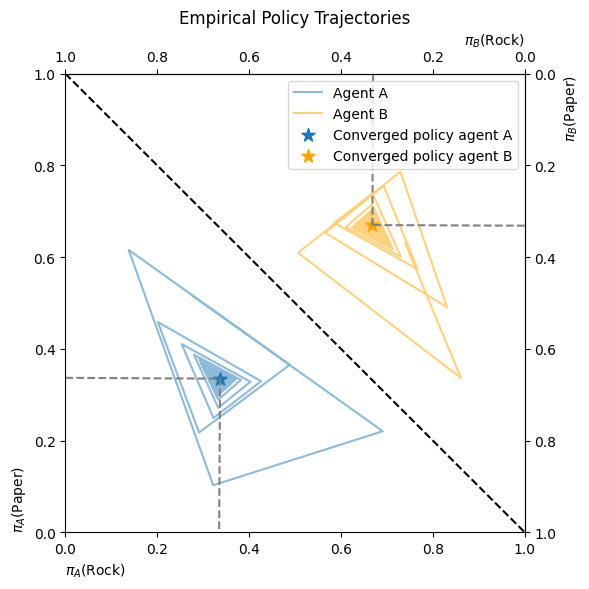

En el grafico de arriba podemos observar como a medida que repetimos el juego de *Rock, Paper, Scissors* ambos agentes van convergiendo su política hacía $\pi(R) = \pi(P) = \frac{1}{3}$, y por lo tanto, también a $\pi(S) = 1 - \pi(R) - \pi(p) = \frac{1}{3}$.   

#### Blotto  

**Descripción:**  
Blotto es un juego competitivo de estrategia, donde dos jugadores se enfrentan por ganar la mayor cantidad de frentes posibles. Cada jugador cuenta con S soldados que debe repartir en N fuertes con el objetivo de ganar en la mayoría de ellos. Un jugador conquista un frente si tiene más soldados en este que su contrincante. Gana el jugador que más fentes conquiste.    

**Ambiente:**  
* Tipo de juego: *Repeated Normal-Form Game*.  
* Jugadores: 2 en la versión implementada.    
* Conjunto de acciones posibles: $A = \{S_0, S_1, ..., S_N\}$, con $\sum_i^N{S_i} = S$ (mi acción es cuantos soldados colocar en c/u de los N frentes siendo que tengo S soldados).  
* Valores posibles del estado: {acción conjunta de los jugadores\} = $A \times A$
* Recompensas: $R = \{-1, 0, 1\}$, r=1 es la recompensa por ganar, r=0 de empatar y r=-1 por perder.  

**Nota:** Las recompensas son de suma cero. Como todos los frentes tienen el mismo valor y jugar (S=5, N=3) [2, 2, 1] es igual a jugar [2, 1, 2] o [1, 2, 2] y podemos reducir el espacio de estados, podemos reducir aún más la cantidad de estados si imponemos que siempre debe haber al menos un soldado por frente.  

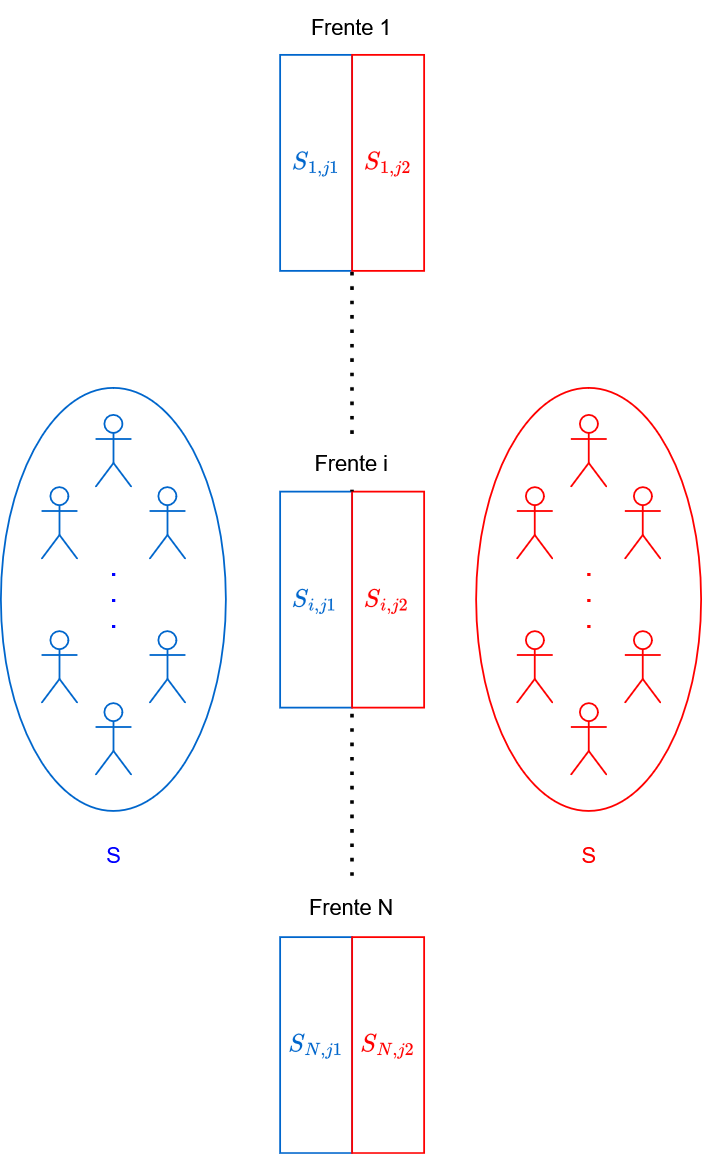

Para este juego no hay un único equilibrio de Nash posible, sin embargo, dos agentes *fictitiousplay* que se enfrenten siempre terminaran convergiendo sus políticas a uno. Algunos nodos de Nash para S=10 y N=4 pueden ser [ $a_0 = \left( 2, 2, 2, 4 \right)$, $a_1 = \left( 2, 2, 3, 3 \right)$] o [$a_0 = \left( 2, 2, 3, 3 \right)$, $a_1 = \left( 2, 2, 3, 3 \right)$ ]. En cualquiera de los dos casos ambos agentes estan conformes ya que empatan y no hay mejor forma de responder (igualmente buena sí, pero mejor no). Lo mismo sucedería si ambos eligieran $a=\left( 2, 2, 2, 4 \right)$.    

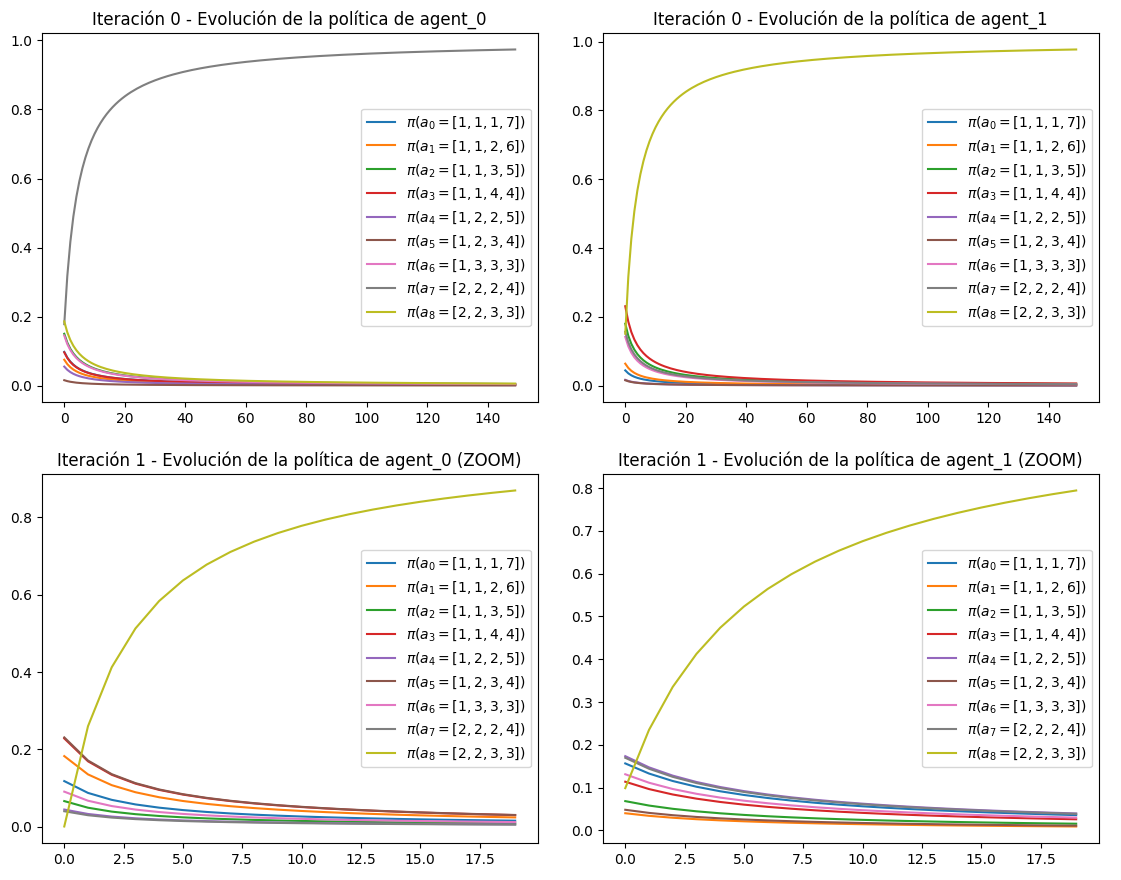

Para unas pocas iteraciones los agentes ya convergen su política.

#### Comentarios

Como podemos ver, *Matching Pennies* y *Rock-Paper-Scissors* convergen a un único equilibrio de Nash. En cambio, Blotto puede presentar múltiples equilibrios de Nash, dependiendo de la configuración del juego.

En particular, para el caso de *Blotto*(S=10 y N=4), los equilibrios de Nash se encuentran en las políticas que asignan probabilidad únicamente a las acciones $a_7$​ o $a_8$​. En la practica se favorce a la acción $a_8$ que es más robusta frente a las demás acciones posibles lo que hace que en el transitorio sea "preferida" y se converja a uan política que seleccione esta acción.   

### FP vs RandomAgent  

En este apartado observaremos como interactuan un agente que implementa el algoritmo de *Ficticious Play* con un *RandomAgent* que toma acciones de manera uniforme. 

#### Matching Pennies
En el caso particular de *Matching Pennies* si se juega contra un *RandomAgent* practicamente no importa que acción tomemos como las acciones del contrincante son completamente aleatorias e impredecibles, podemos, por ejemplo, tomar siempre la misma acción e igual ganaremos la mitad de las veces.  

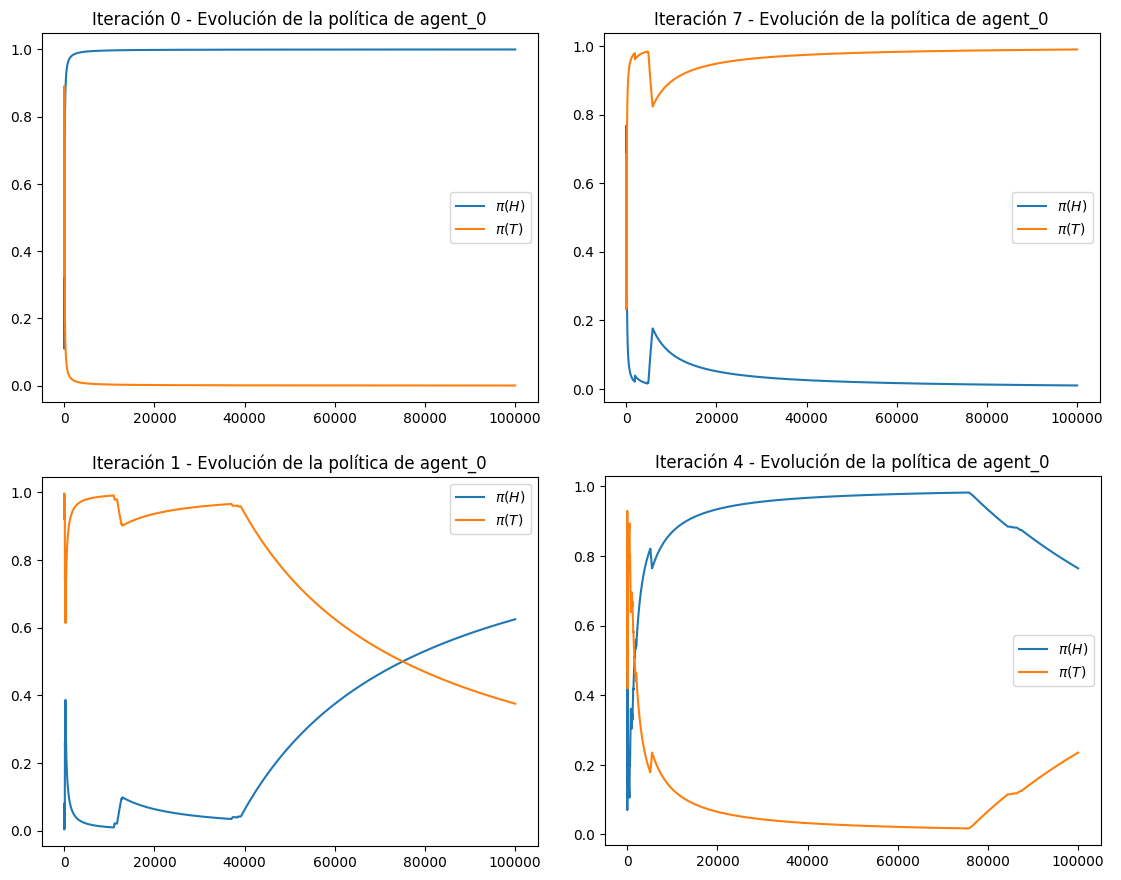

En las imágenes de arriba ilustramos únicamente la evolución de la política del agente *fictitiousplay* para ilustrar que ira variando su valor en respuesta a lo que *RandomAgent* juegue, con una alta inercia a medida que crece el tiempo. La ganancia esperada no depende de la política y es siempre cero.

#### Rock, Paper, Scissors

De forma muy similar a lo que sucede con *Matching Pennies*, cuando el agente que implementa *fictitiousplay* compite contra el agente randomico, no lográ llegar a un equilibrio ya que intenta explotar ventajas que extrapola de las frecuencias de su oponente que son producto de los sorteos y no de su polítitca real. Esto "confunde" al algoritmo, de nuevo, sin importar la política la ganancia esperada es 0.

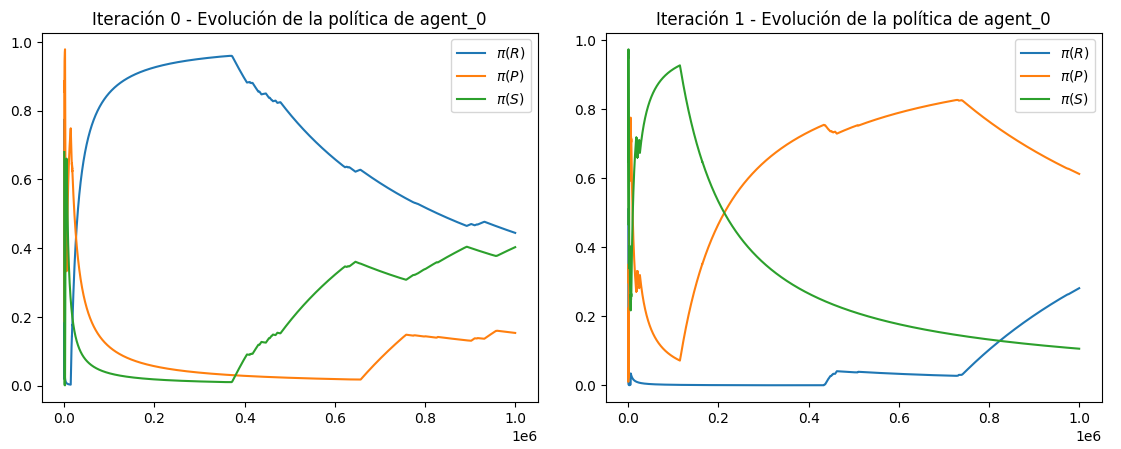

#### Blotto

El agente que implementa *fictitiousplay* elegirá la acción que mejor performe contra todas las demás posibles acciones (que el *RandomAgent* elegirá aleatoriamente con la misma probabilidad). Para el caso de S=10 y N=4 la mejor opción es $a_8 = [2, 2, 3, 3]$ y podemos comprobarlo en la siguiente tabla:  

| Acción               | Gana | Empata | Pierde |
| -------------------- | ---- | ------ | ------ |
| $a_0 = [1, 1, 1, 7]$ | 0    | 4      | 5      |
| $a_1 = [1, 1, 2, 6]$ | 0    | 5      | 4      |
| $a_2 = [1, 1, 3, 5]$ | 0    | 8      | 1      |
| $a_3 = [1, 1, 4, 4]$ | 1    | 6      | 2      |
| $a_4 = [1, 2, 2, 5]$ | 2    | 5      | 2      |
| $a_5 = [1, 2, 3, 4]$ | 3    | 5      | 1      |
| $a_6 = [1, 3, 3, 3]$ | 2    | 6      | 1      |
| $a_7 = [2, 2, 2, 4]$ | 2    | 7      | 0      |
| $a_8 = [2, 2, 3, 3]$ | 4    | 5      | 0      |


Efectivamente esto es lo que sucede al experimentar:

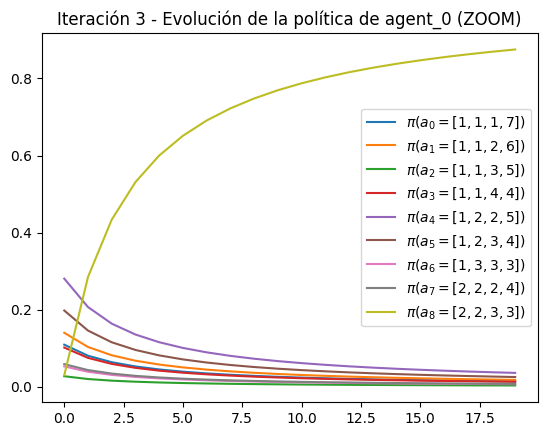

Para varias iteraciones de este experimento pudimos confirmar que la acción elegida por la política del agente fictitious play es $a_8$.

### FP vs RM

#### Matching Pennies y Rock, Paper, Scissors 
Para este juego los dos agentes compiten y sus políticas oscilan alrededor de los valores antes hallados de $\pi \left(T=0.5, H=0.5\right)$. En esa competencia y la adaptación de la política a la mejor respuesta de la política de su contrincante, ambas politicas oscilan en el tiempo, lo que da como resultado que las recompensas también oscilen. Algo muy similar ocurre con *Rock, Paper, Scissors*. 

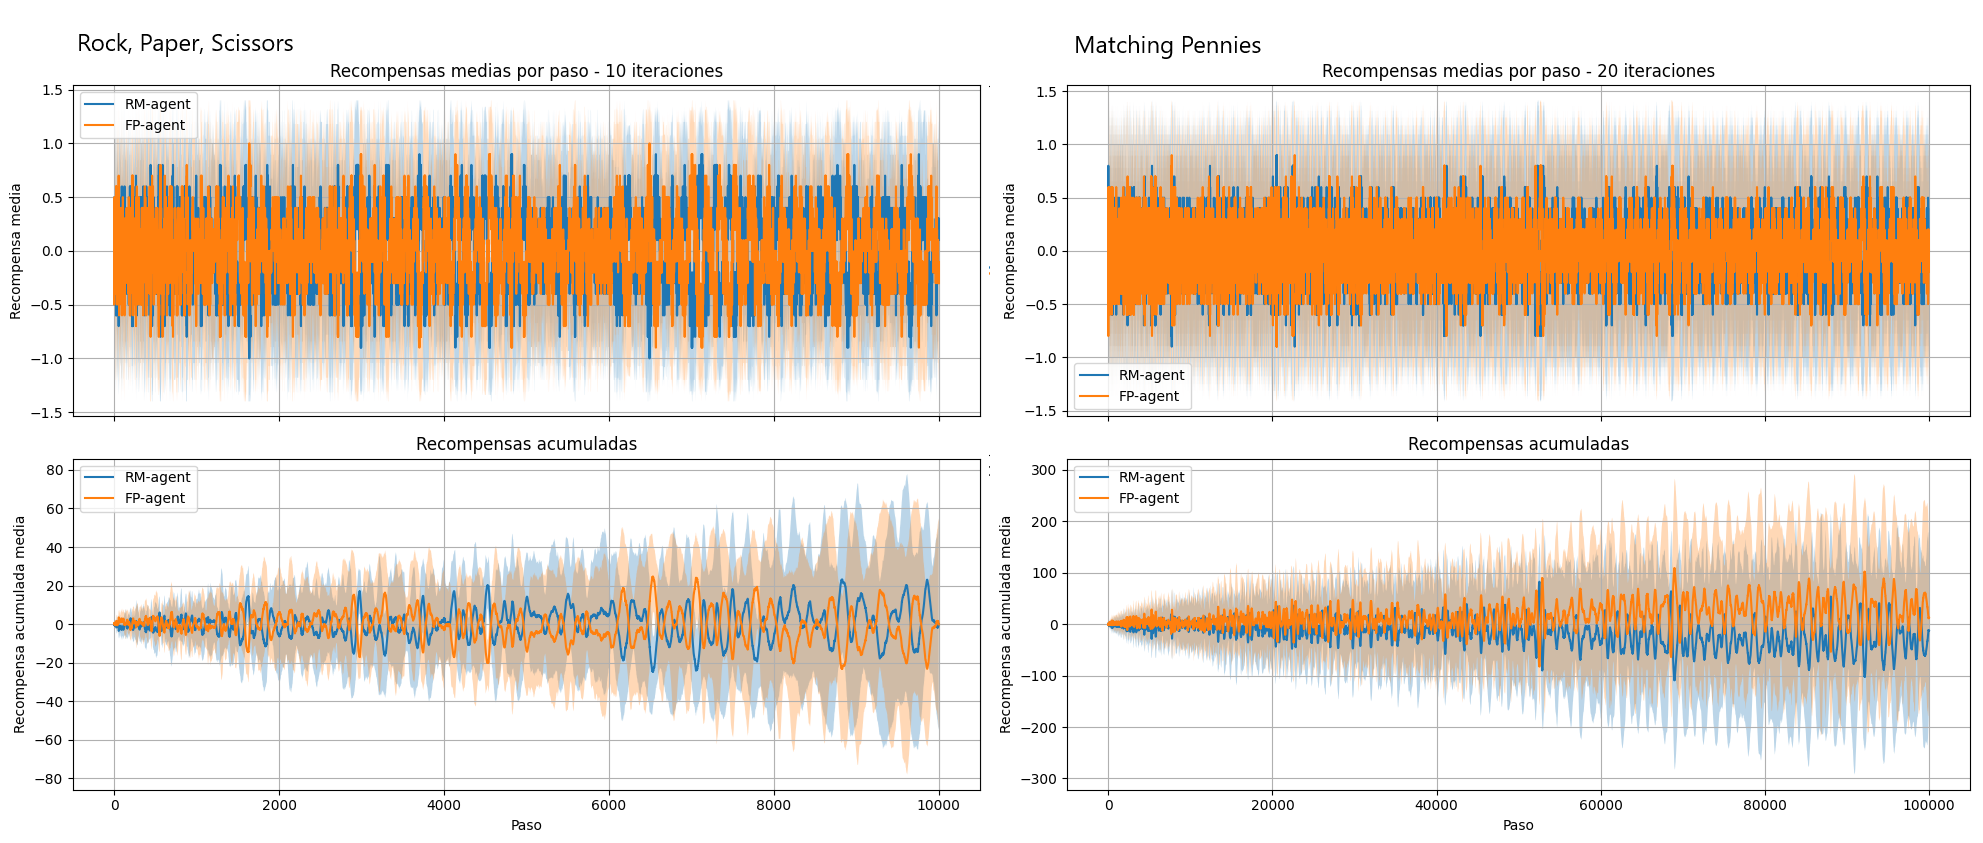

De los experimentos concluimos qu een media ambos agentes van a tener una performance similar, se van a ir adaptando para vencer la estrategia del otro y esos cambios que generan al rededor del óptimo van a ser explotados por el contrincante, generando las oscilaciones visualizadas. Es un poco extraño que en el caso de Matching Pennies en la recompensa acumulada parezca haber una ventaja del *ficticiousplay agent* sobre su contrincante, esto podría corregirse en $t \to \infty$ o ser un arrastre de una ventaja que *ficticiousplay agent* exploto a partir de las condiciones iniciales.  
Para realizar los experimentos se realizaron varias iteraciones (RPS: 10, MP: 100) de juegos que se repitieron 10mil para *Rock, Paper, Scissors* y 100mil veces en el caso de *Matching Pennies*.

#### Blotto
Para este juego ambos agentes acuerdan un equilibrio (de Nash) y hacen estaticas sus políticas. Eso supone, luego de una etapa de transición, que los agentes empatan hasta el final de los tiempos. Para esta combinación durante el transitorio *fictitiousplay* performa mejor.    

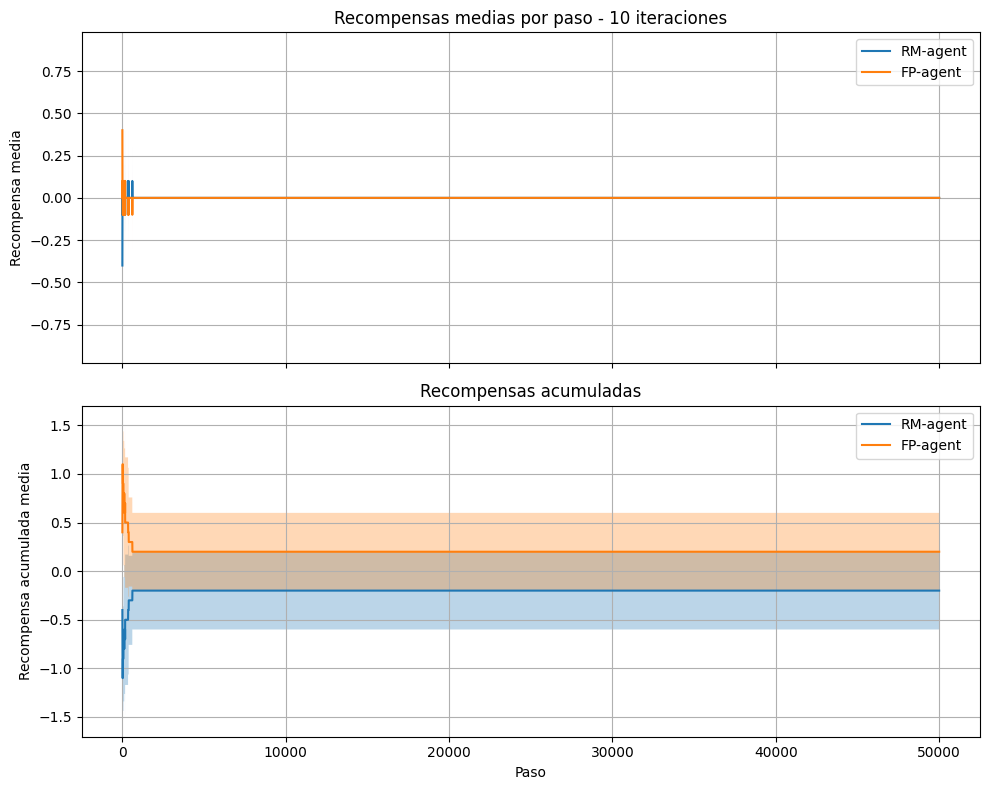

### IQL vs IQL

En este apartado mostraremos los resultados experimentales obtenidos de la interacción entre dos o más agentes Independet Q-Learning (IQL).
Los agentes interactuaran con el ambiente del juego *Foraging* de *gymnasium*. A continuación describimos el juego.

#### Foraging
Foraging es un entorno multiagente sobre una grilla, en el que varios jugadores deben desplazarse por el tablero para recolectar comida. Cada ítem de comida tiene un peso asociado, y cada agente cuenta con una capacidad de carga limitada.  

La dinámica del juego depende del modo:  
* En el modo competitivo, los agentes compiten por la comida. Aquellos que logren recolectarla solos o antes que los demás reciben mayores recompensas.

* En el modo cooperativo, la comida suele tener un peso mayor al que un solo agente puede levantar. En estos casos, se incentiva la cooperación: los agentes deben coordinarse para recoger los ítems juntos, y las recompensas se distribuyen entre todos los participantes involucrados en la recolección.

**Ambiente:**  
* Tipo de juego: *Stochastic Game*.  
* Jugadores: N jugadores.    
* Conjunto de acciones posibles: $A = \{ NONE, NORTH, SOUTH, WEST, EAST, LOAD \}$.  
* Definición del estado del agente i: $s_i = \left( x_{\text{food}},\ y_{\text{food}},\ w_{\text{food}},\ x_{a_i},\ y_{a_i},\ w_{a_i},\ \left\{ x_{a_j},\ y_{a_j},\ w_{a_j} \right\}_{j \ne i} \right)$.  
* Recompensas del jugador i:
    * Modo competitivo:  
    $$
    r_i =
    \begin{cases}
    \min(w_{a_i},\ w_{\text{food}}) & \text{si el agente } i \text{ levanta la comida,} \\
    0 & \text{en caso contrario.}
    \end{cases}
    $$

    * Modo cooperativo:  
    Sea $C$ el conjunto de agentes que colaboran en cargar la comida, entonces:   
    $$
    r_i =
    \begin{cases}
    \dfrac{w_{\text{food}}}{|C|} & \text{si } i \in C, \\
    0 & \text{en caso contrario.}
    \end{cases}
    $$
 
 Como la cantidad de estados posibles es muy grande, entrenaremos y evaluaremos sobre un tablero fijo, donde siempre partimos del mismo lugar, la comida esta fija y el estado cambia con el movimiento de los agentes.  

##### Tamaño: 5x5, Comidas: 1, Jugadores: 2xIQL

Condiguración del juego:  
Foraging-5x5-2p-1f-v3

Configuración de los agentes:  
start_epsilon=0.99, min_epsilon=0.1, epsilon_decay=0.9995, alpha=0.15, gamma=0.95, learn=True, seed=1
'episodes': 1000, 'iterations': 20    

El experimento más rápido fue entrenar dos agentes IQL en un tablero de 5x5 casilleros jugando en modo competitivo por obtener una única comida.  
Para entrenar realizamos 20 iteraciones de 2000 episodios cada una y observamos una convergencia a partir de las 10 iteraciones o lo que es igual, 20000 episodios. Para lograr la convergencia es muy importante que el valor de $\epsilon$ decaíga con cada *step*.  
Es muy importante explorar durante los primeros *steps*, sin embargo, si el valor de $\epsilon$ no decae lo suficientemente rápido corremos el riesgo de converger a la política $\epsilon$ óptima.  
También son importantes los valores de $\gamma$ y $\alpha$, que mantuvimos fijos para todos los casos en 0.95 y 0.15 respectivamente.   

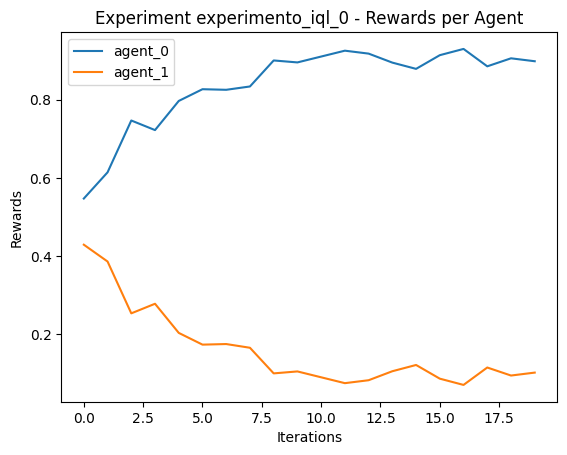

Como estamos jugando con una configuración fija, a medida que los agentes aprenden, el que terminará por ganar será aquel que comienza en una posición más cerca a la comida. En este caso el agente *agent_0*.   


##### Tamaño: 7x7, Comidas: 1, Jugadores: 3xIQL
En un caso un poco más exigente, definimos un tablero de 7x7 casilleros, con tres jugadores y una única comida.  
Condiguración del juego:  
Foraging-7x7-3p-1f-v3

Configuración de los agentes:  
start_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.99995, alpha=0.2, gamma=0.95, learn=True, seed=1
'episodes': 2000, 'iterations': 50

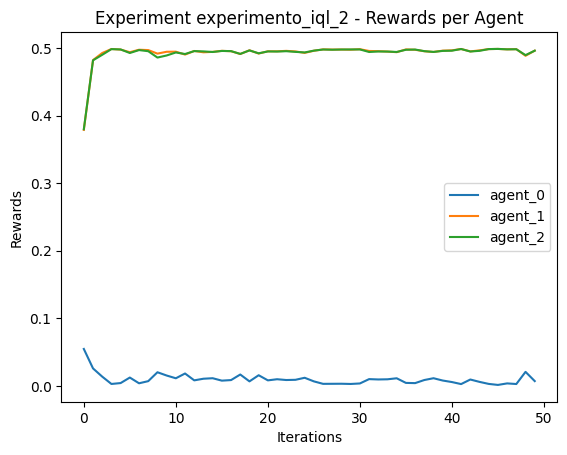

##### Tamaño: 7x7, Comidas: 1, Jugadores: 3xIQL, COOPERATIVO  
Condiguración del juego:  
Foraging-7x7-3p-1f-coop-v3

Configuración de los agentes:  
start_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.99995, alpha=0.2, gamma=0.95, learn=True, seed=1
'episodes': 2000, 'iterations': 50

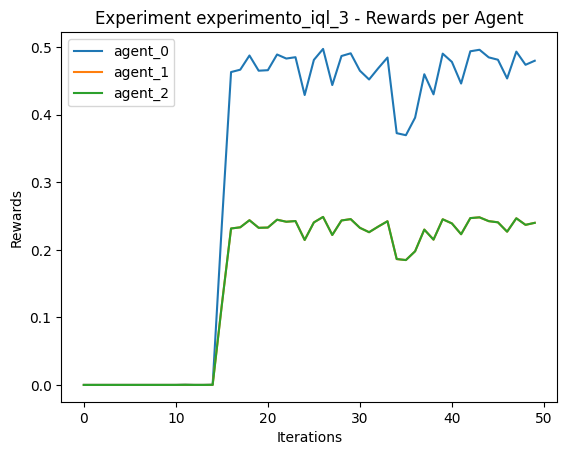

### JAL-AM vs JAL-AM  
En este apartado compararemos agentes *Joint Action Learn - Agent Modeling* contra uno o más pares. 

**Nota:** Es un algoritmo que al menos, en su implementación actual demostro demorar más en iterar que lo que es un agente *IQL*.  

##### Tamaño: 5x5, Comidas: 1, Jugadores: 2xJAL-AM
Condiguración del juego:  
Foraging-5x5-2p-1f-v3

Configuración de los agentes:  
start_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.99985, alpha=0.15, gamma=0.95, learn=True, seed=1  
'episodes': 1000, 'iterations': 20

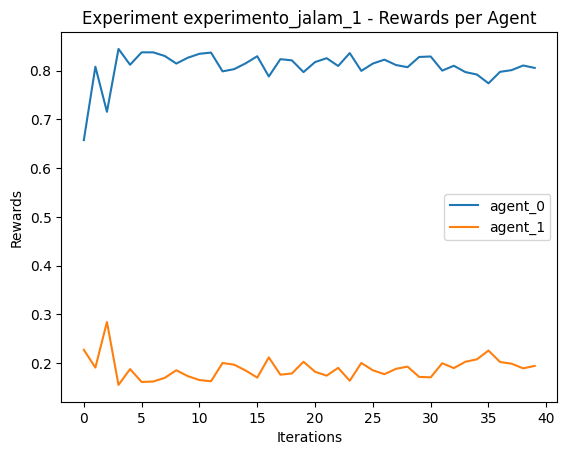

Similar a lo que sucedio con IQL, un agente, el más cercano a la comida aprende a ganar.

##### Tamaño: 7x7, Comidas: 1, Jugadores: 3xJAL-AM

Condiguración del juego:  
Foraging-7x7-3p-1f-v3

Configuración de los agentes:  
start_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.99996, alpha=0.2, gamma=0.95, learn=True, seed=1  
'episodes': 1000, 'iterations': 40

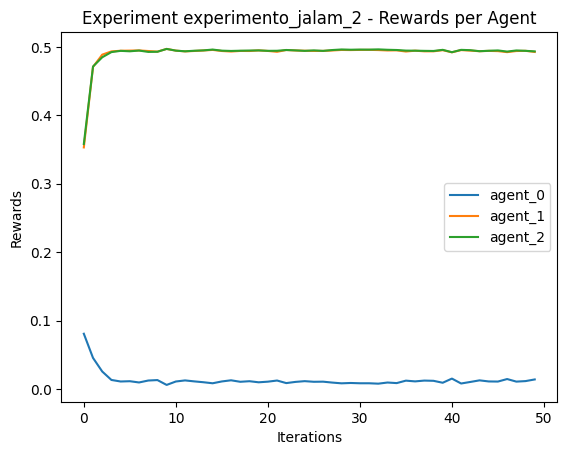


Para esta configuraciones observamos, al igual que con IQL, que dos agentes lográn comaprtir victorias mientras que otro queda desplazado.

##### Tamaño: 7x7, Comidas: 1, Jugadores: 3xJAL-AM, COOPERATIVO  

Condiguración del juego:  
Foraging-7x7-3p-1f-coop-v3

Configuración de los agentes:  
start_epsilon=1.0, min_epsilon=0.1, epsilon_decay=0.99996, alpha=0.2, gamma=0.95, learn=True, seed=1  
'episodes': 2000, 'iterations': 80

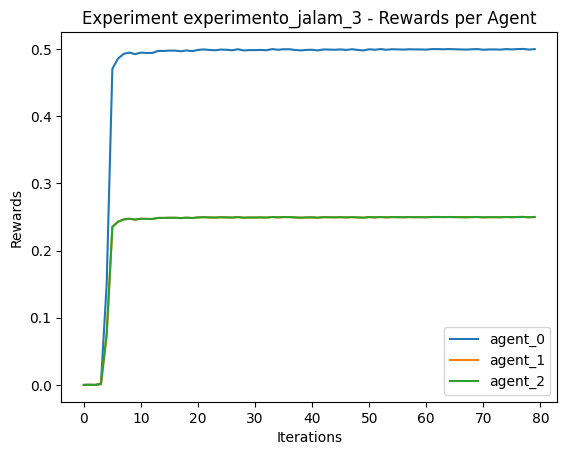

En este caso, *agent_0* lográ un 50% de victorias mientras que el resto 50% lo comaprten *agent_1* y *agent_2*. Aquí hay que considerar que la recompensa es compartida, podría pasar que siempre sea *agent_0* a la par de alguno de los otros dos agentes quienes carguen al comida. Seguramente *agent_0* es el agente más cercano a la comida. Algo similar sucedia con IQL.

### IQL vs JAL-AM

Hay experimentaciones en el Notebook JALAMvsIQL.  



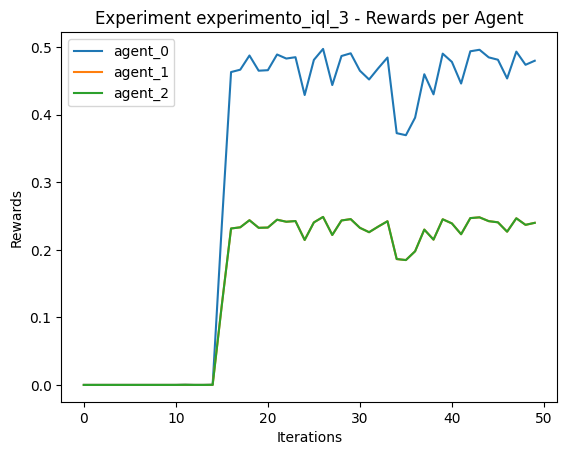

In [2]:
# IGNORAR
"""
import base64

with open(r"C:\Users\Guillermo\Downloads\foraging_iql_7x7_3j_coop.png", "rb") as img_file:
    encoded_string = base64.b64encode(img_file.read()).decode('utf-8')

# Para HTML:
html_img = f'<img src="data:image/png;base64,{encoded_string}" alt="Rock, Paper, Scissors"/>'
print(html_img)
"""

# Conclusiones
Resulta interesante poder experimentar los algoritmos vistos en clase y aplicarlos a juegos reales que en alguna ocasión tuvimos la oportunidad de discutir en clase. Se puede ver como los algoritmos compiten por tomar ventaja del otro, lo que puede llegar a que en juegos del estilo de suma cero se llegue a oscilar al rededor de la política óptima. Hubiera sido interesante observar la explotación de un agente *Fictitous Play* o *Regret Matching* frente a un adversario de política fija, aunque a menos que el adversario jugara de forma randomica, sabemos que hubiera sido explotado.   

Por otro lado, pudimos ver como podemos aplicar algoritmos que ya usamos en sistemas que no son multiagentes y hacerlos funcionar junto a otros agentes. Esto implica, por un lado, que el estado va a estar compuesto también por el estado de los demás agentes, y el problema de la maldición de la dimensionalidad se ve aumentado. Por otro lado y quizás más importante, es díficil que un agente independiente aprenda a interactuar con los demás si no se comportan de forma regular durante el entrenamiento. Aquí toma ventaja el algoritmo de *JAL-AM* que por un lado utilizá la acción conjunta de todos los agentes para valorar sus propias decisiones, y por otro lado modela las políticas de los demás agentes con el fin de poder predecir la probabilidad de futuras acciones. Esto resulta en una mejor cooperación y podría incluso suponer un competidor mejor que puede preveer y entorpecer las acciones de sus competidores.

## Next Steps

1. Entrenar conjuntamente agentes IQL y agentes JAL-AM en grandes entornos y determinar si los agentes JAL-AM terminan interactuando casi exclusivamente entre ellos o si IQL lográ unirse a cooperar.  
2. Tomar un agente JAL-AM y hacerlo competir contra un agente IQL en diversos escenarios y ver si puede tomar ventaja de preveer los movimientos de IQL.   
3. Tomar un agente JAL-AM suficientemente entrenado, hacerlo competir con un agente IQL y permitir que de manera *online* modelo la política de su contrincante.  
4. Igual que en 3 pero pasandole Q del IQL al agente JAL-AM para que determine su política y ver si su rendimiento mejora y por cuanto.  
5. Jugar *Blotto* desbalanceado, dando pesos diferentes a los distintos frentes y ver como afecta (por ej. con un frente muy valioso).  

# Anexos

**Repositorio GIT:**  
**Comentarios:**  